# MRI Preprocessing

### Binary Mask (Binary Threshold plus Contouring MRI Mask)

In [ ]:
%pip install opencv-python
%pip install matplotlib                                                                                           


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_mri_mask(image, threshold=20):
    """
    Create a binary mask for the main region of the MRI image with Gaussian Blur
    """
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Thresholding to create a binary mask
    _, binary = cv2.threshold(blurred, threshold, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create an empty mask
    mask = np.zeros_like(image, dtype=np.uint8)
    
    if contours:
        # Select the largest contour (assuming it's the main region of interest)
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Fill the largest contour to create a mask
        cv2.drawContours(mask, [largest_contour], -1, 255, -1)
    
    return mask

def mask_mri_image(input_path, output_mask_path, output_image_path):
    """
    Apply masking to MRI image and save the mask separately
    """
    # Read image
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Failed to read image: {input_path}")
        return False
    
    # Generate mask
    mask = create_mri_mask(img)
    
    # Apply mask to image
    masked_img = img.copy()
    masked_img[mask == 0] = 0
    
    # Ensure mask is properly scaled
    mask_uint8 = cv2.normalize(mask, None, 0, 255, cv2.NORM_MINMAX)
    
    # Save masked image and mask separately
    cv2.imwrite(output_image_path, masked_img)
    cv2.imwrite(output_mask_path, mask_uint8)
    
    
    return True

# Define input and output directories
input_dir = "./Dataset/MRI"
output_dir = "./Dataset/mri_binary_image"
mask_only_dir = "./Dataset/mri_binary_mask"

# Create output directories if they do not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
if not os.path.exists(mask_only_dir):
    os.makedirs(mask_only_dir)

# Process each image in the folder
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        input_path = os.path.join(input_dir, filename)
        output_image_path = os.path.join(output_dir, filename)
        output_mask_path = os.path.join(mask_only_dir, filename.replace(".jpg", "_mask.jpg").replace(".png", "_mask.png"))
        
        print(f"Processing MRI image: {filename}")
        if mask_mri_image(input_path, output_mask_path, output_image_path):
            print(f"Successfully processed and saved: {output_image_path} and {output_mask_path}")
        else:
            print(f"Failed to process: {filename}")


Processing MRI image: mri1.jpg
Successfully processed and saved: ./Dataset/mri_binary_image\mri1.jpg and ./Dataset/mri_binary_mask\mri1_mask.jpg
Processing MRI image: mri1001.jpg
Successfully processed and saved: ./Dataset/mri_binary_image\mri1001.jpg and ./Dataset/mri_binary_mask\mri1001_mask.jpg
Processing MRI image: mri1002.jpg
Successfully processed and saved: ./Dataset/mri_binary_image\mri1002.jpg and ./Dataset/mri_binary_mask\mri1002_mask.jpg
Processing MRI image: mri1003.jpg
Successfully processed and saved: ./Dataset/mri_binary_image\mri1003.jpg and ./Dataset/mri_binary_mask\mri1003_mask.jpg
Processing MRI image: mri1004.jpg
Successfully processed and saved: ./Dataset/mri_binary_image\mri1004.jpg and ./Dataset/mri_binary_mask\mri1004_mask.jpg
Processing MRI image: mri1005.jpg
Successfully processed and saved: ./Dataset/mri_binary_image\mri1005.jpg and ./Dataset/mri_binary_mask\mri1005_mask.jpg
Processing MRI image: mri1006.jpg
Successfully processed and saved: ./Dataset/mri_bin

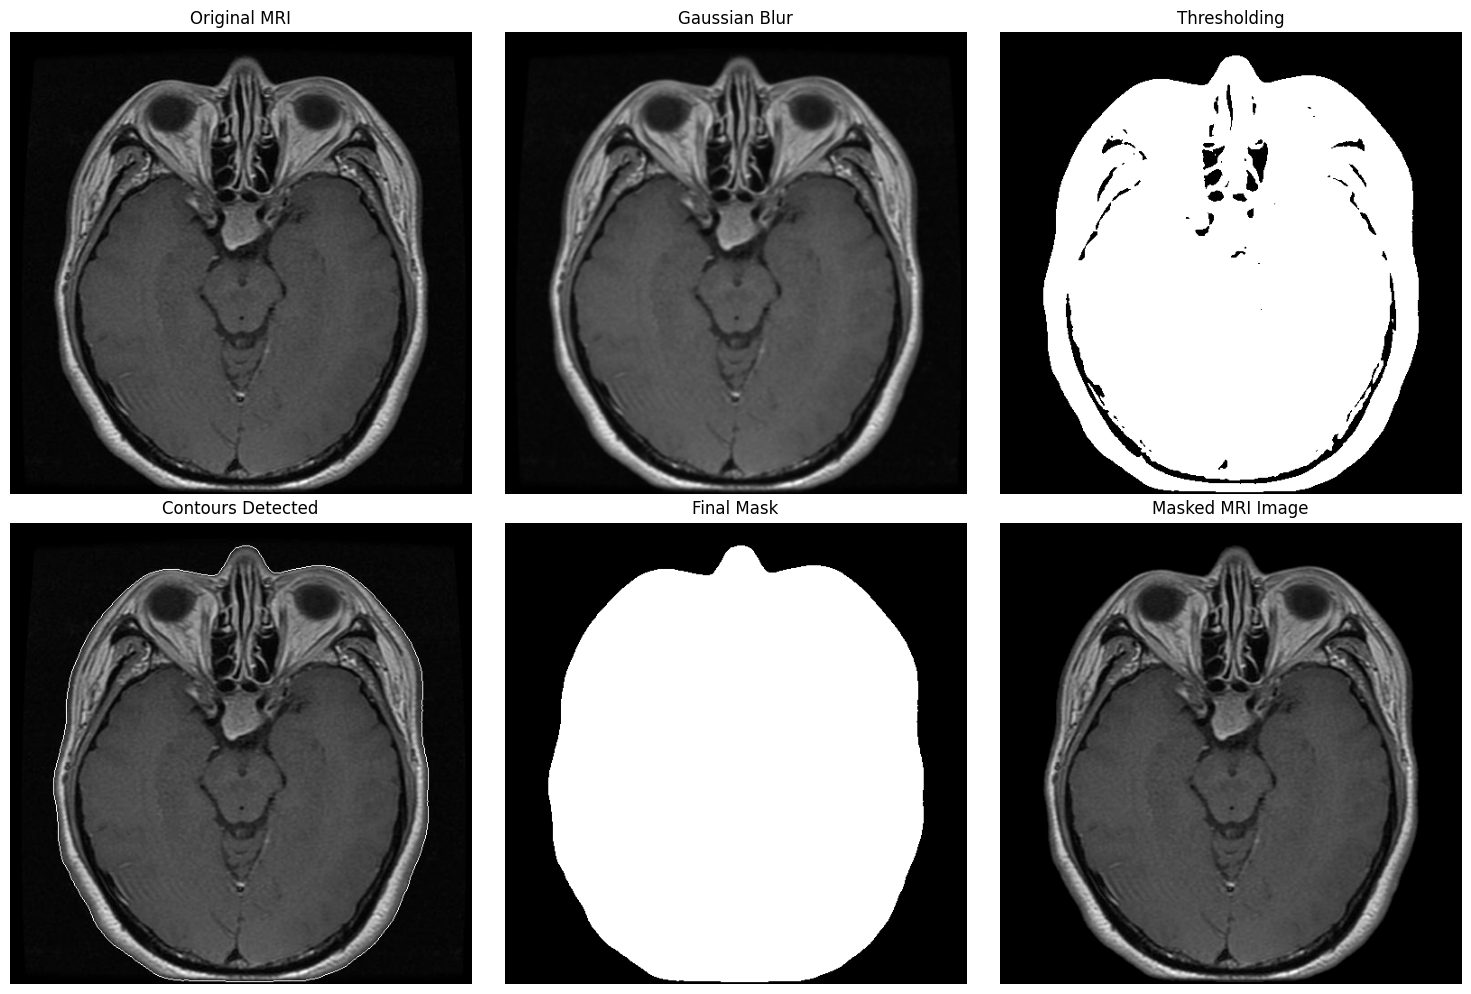

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def create_mri_mask(image, threshold=20):
    """
    Create a binary mask for the main region of the MRI image using thresholding and contour detection.
    """
    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Apply thresholding to create a binary mask
    _, binary = cv2.threshold(blurred, threshold, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create an empty mask
    mask = np.zeros_like(image, dtype=np.uint8)
    
    if contours:
        # Select the largest contour (assuming it's the main region of interest)
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Fill the largest contour to create a mask
        cv2.drawContours(mask, [largest_contour], -1, 255, -1)
    
    return mask, binary, contours

# Load a single MRI image for visualization
image_path = "./Dataset/MRI/mri5.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError(f"Error: Unable to load image {image_path}")

# Generate mask using binary threshold + contouring
mask, binary, contours = create_mri_mask(image)

# Apply mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Visualization of different processing steps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

titles = [
    "Original MRI", "Gaussian Blur", "Thresholding",
    "Contours Detected", "Final Mask", "Masked MRI Image"
]
images = [
    image, cv2.GaussianBlur(image, (5, 5), 0), binary,
    cv2.drawContours(image.copy(), contours, -1, (255, 0, 0), 1), mask, masked_image
]

for i in range(6):
    cmap = 'gray' if len(images[i].shape) == 2 else None
    axes[i].imshow(images[i], cmap=cmap)
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.tight_layout()
plt.show()


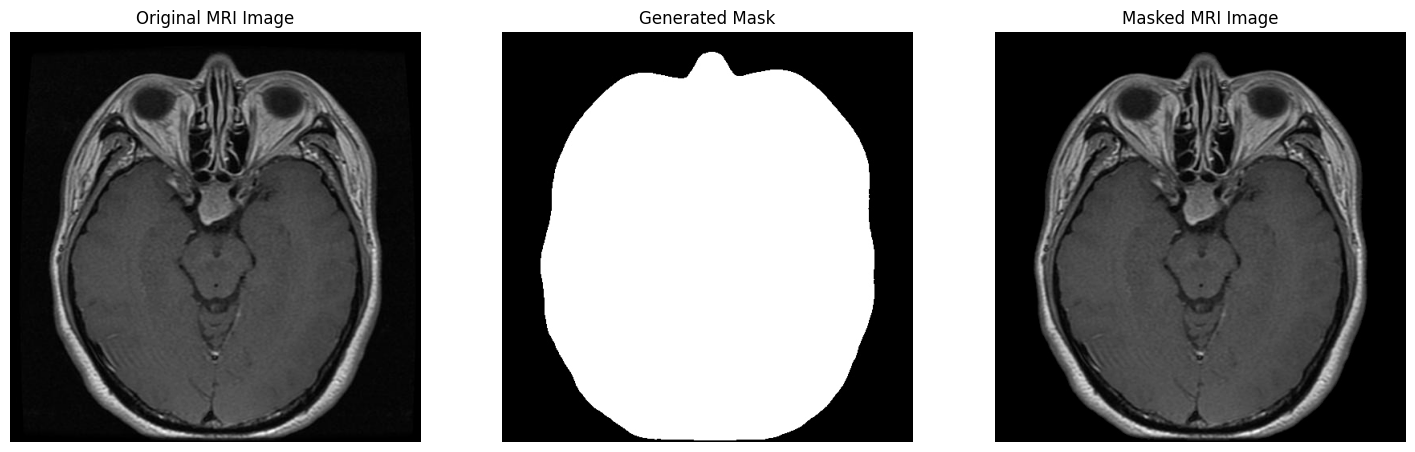

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define file paths for mri5
original_image_path = "./Dataset/mri/mri5.jpg"
masked_image_path = "./dataset/mri_binary_image/mri5.jpg"
mask_image_path = "./dataset/mri_binary_mask/mri5_mask.jpg"

# Load images
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
masked_image = cv2.imread(masked_image_path, cv2.IMREAD_GRAYSCALE)
mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

# Check if all images are loaded correctly
if original_image is None:
    print(f"Error: Unable to load {original_image_path}")
if masked_image is None:
    print(f"Error: Unable to load {masked_image_path}")
if mask_image is None:
    print(f"Error: Unable to load {mask_image_path}")

# Proceed with plotting only if all images are loaded
if original_image is not None and masked_image is not None and mask_image is not None:
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original MRI Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_image, cmap='gray')
    plt.title("Generated Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(masked_image, cmap='gray')
    plt.title("Masked MRI Image")
    plt.axis("off")

    plt.show()
else:
    print("One or more images could not be loaded. Please check file paths.")


In [4]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip show scikit-image


Name: scikit-image
Version: 0.25.1
Summary: Image processing in Python
Home-page: 
Author: 
Author-email: 
License: Files: *
 Copyright: 2009-2022 the scikit-image team
 License: BSD-3-Clause

 Files: doc/source/themes/scikit-image/layout.html
 Copyright: 2007-2010 the Sphinx team
 License: BSD-3-Clause

 Files: skimage/feature/_canny.py
        skimage/filters/edges.py
        skimage/filters/_rank_order.py
        skimage/morphology/_skeletonize.py
        skimage/morphology/tests/test_watershed.py
        skimage/morphology/watershed.py
        skimage/segmentation/heap_general.pxi
        skimage/segmentation/heap_watershed.pxi
        skimage/segmentation/_watershed.py
        skimage/segmentation/_watershed_cy.pyx
 Copyright: 2003-2009 Massachusetts Institute of Technology
            2009-2011 Broad Institute
            2003 Lee Kamentsky
            2003-2005 Peter J. Verveer
 License: BSD-3-Clause

 Files: skimage/filters/thresholding.py
        skimage/graph/_mcp.pyx
       

### Water Shed Algorithm


In [6]:
import cv2
import numpy as np
import os
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage

def apply_watershed(image_path, output_folder, mask_folder):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply thresholding with a lower threshold to capture soft tissue
    _, binary = cv2.threshold(blurred, 15, 255, cv2.THRESH_BINARY)
    
    # Perform morphological operations to clean up the binary image
    kernel = np.ones((3, 3), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    # Compute the distance map
    distance_map = ndimage.distance_transform_edt(binary)
    
    # Find peaks with reduced min_distance to capture more tissue regions
    local_max_coords = peak_local_max(distance_map, min_distance=20, labels=binary)
    local_max = np.zeros_like(distance_map, dtype=bool)
    local_max[tuple(local_max_coords.T)] = True
    
    # Perform connected component analysis
    markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
    
    # Apply Watershed
    labels = watershed(-distance_map, markers, mask=binary)
    
    # Create mask for soft tissue
    mask = np.zeros_like(gray, dtype=np.uint8)
    mask[labels > 0] = 255
    
    # Apply mask to original image
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    
    # Save the masked image
    output_filename = os.path.join(output_folder, os.path.basename(image_path))
    cv2.imwrite(output_filename, masked_image)
    
    # Save the mask
    mask_filename = os.path.join(mask_folder, os.path.basename(image_path))
    cv2.imwrite(mask_filename, mask)

def process_folder(input_folder, output_folder, mask_folder):
    # Create output folders if they don't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    if not os.path.exists(mask_folder):
        os.makedirs(mask_folder)
    
    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.tif')):
            image_path = os.path.join(input_folder, filename)
            apply_watershed(image_path, output_folder, mask_folder)

# Example usage
input_folder = "./dataset/mri"
output_folder = "./dataset/mri_watershed_image"
mask_folder = "./dataset/mri_watershed_mask"

process_folder(input_folder, output_folder, mask_folder)


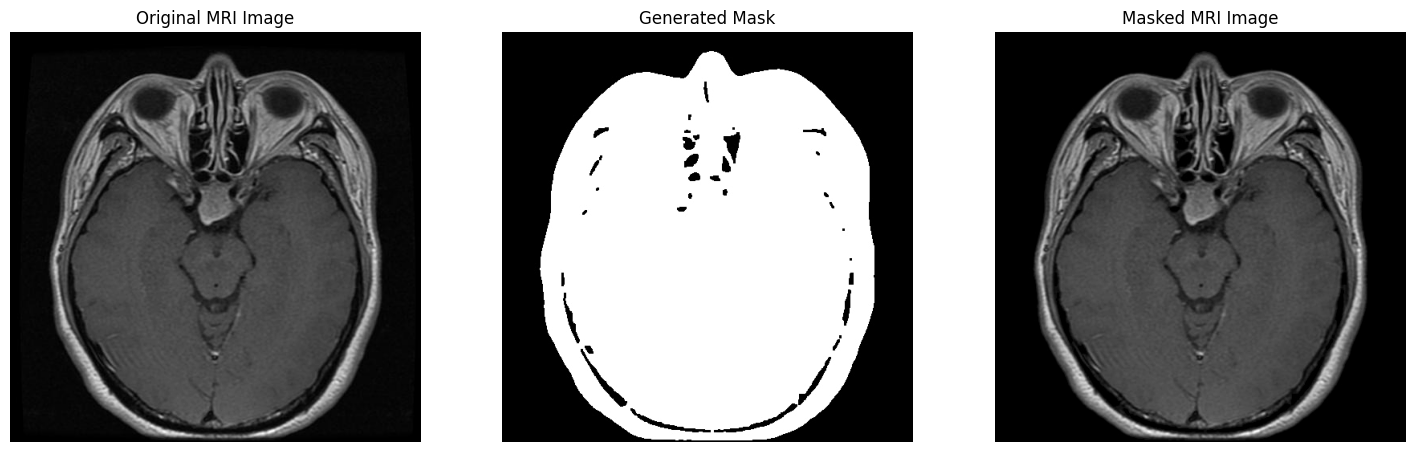

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define file paths for mri5
original_image_path = "./dataset/mri/mri5.jpg"
masked_image_path = "./dataset/mri_watershed_image/mri5.jpg"
mask_image_path = "./dataset/mri_watershed_mask/mri5.jpg"

# Load images
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
masked_image = cv2.imread(masked_image_path, cv2.IMREAD_GRAYSCALE)
mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

# Check if all images are loaded correctly
if original_image is None:
    print(f"Error: Unable to load {original_image_path}")
if masked_image is None:
    print(f"Error: Unable to load {masked_image_path}")
if mask_image is None:
    print(f"Error: Unable to load {mask_image_path}")

# Proceed with plotting only if all images are loaded
if original_image is not None and masked_image is not None and mask_image is not None:
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original MRI Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_image, cmap='gray')
    plt.title("Generated Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(masked_image, cmap='gray')
    plt.title("Masked MRI Image")
    plt.axis("off")

    plt.show()
else:
    print("One or more images could not be loaded. Please check file paths.")


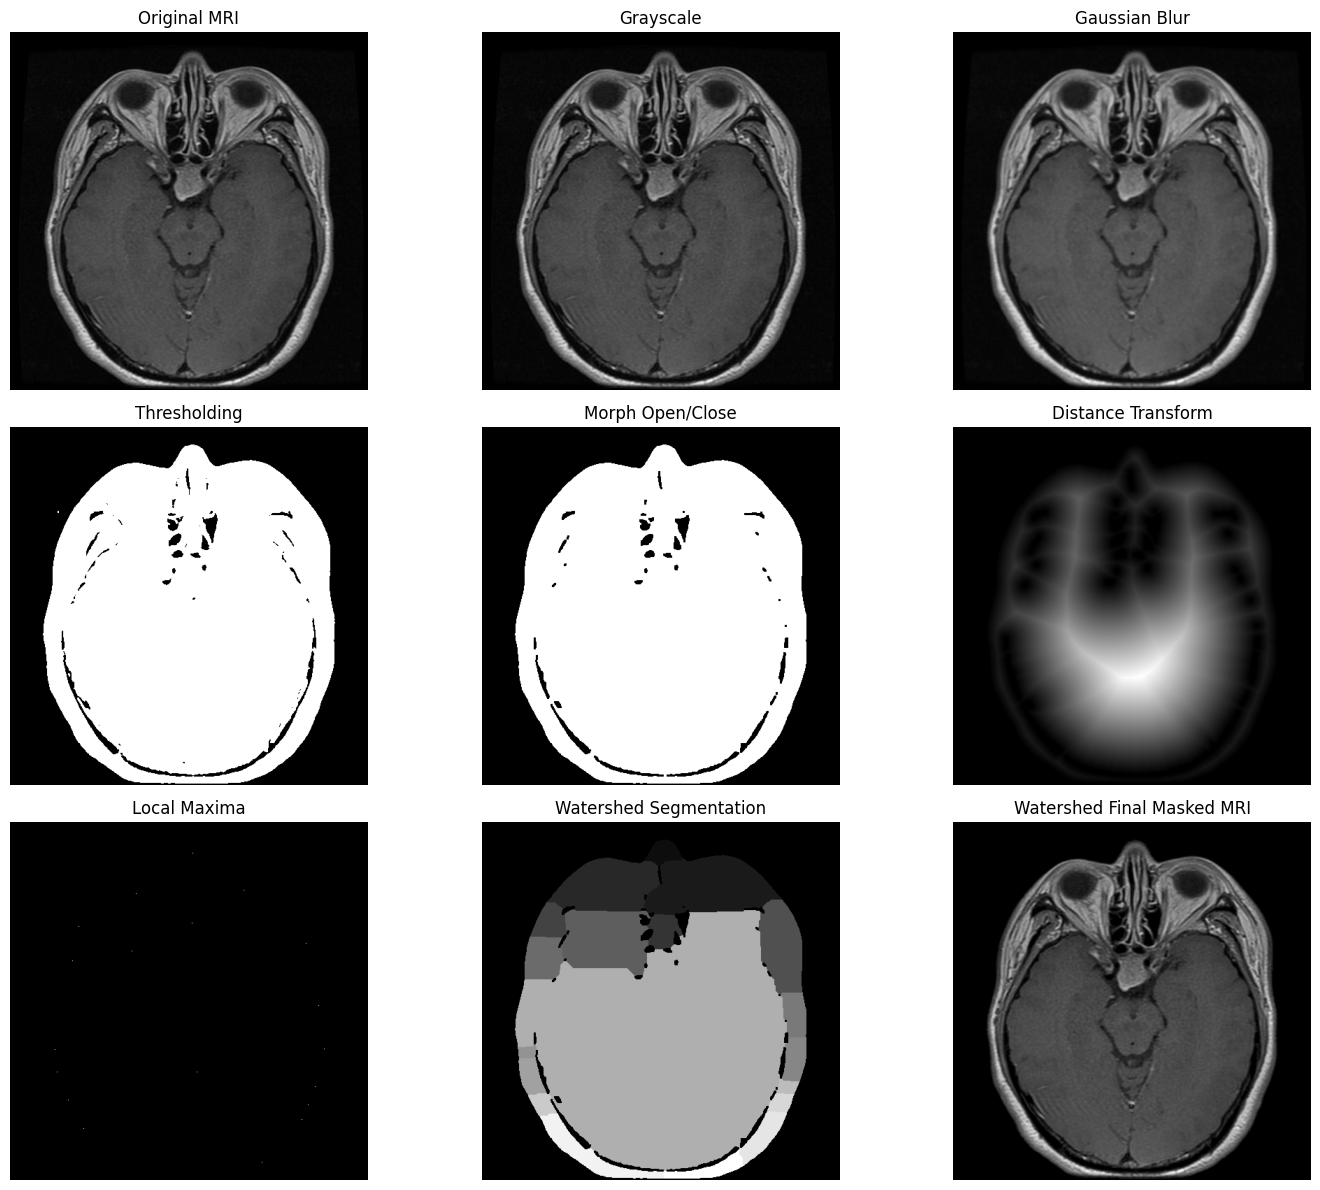

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage

# Load the uploaded MRI image
image_path = "./dataset/mri/mri5.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding to create a binary mask
_, binary = cv2.threshold(blurred, 15, 255, cv2.THRESH_BINARY)

# Morphological operations to clean up the mask
kernel = np.ones((3, 3), np.uint8)
binary_morph = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
binary_morph = cv2.morphologyEx(binary_morph, cv2.MORPH_CLOSE, kernel)

# Compute the distance map
distance_map = ndimage.distance_transform_edt(binary_morph)
distance_map_normalized = cv2.normalize(distance_map, None, 0, 255, cv2.NORM_MINMAX)
distance_map_normalized = distance_map_normalized.astype(np.uint8)

# Detect local maxima
local_max_coords = peak_local_max(distance_map_normalized, min_distance=20, labels=binary_morph)
local_max = np.zeros_like(distance_map_normalized, dtype=bool)
local_max[tuple(local_max_coords.T)] = True

# Perform connected component analysis
markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]

# Apply Watershed Algorithm
labels = watershed(-distance_map_normalized, markers, mask=binary_morph)

# Create final mask
mask = np.zeros_like(gray, dtype=np.uint8)
mask[labels > 0] = 255

# Apply mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Plot all steps
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

titles = [
    "Original MRI", "Grayscale", "Gaussian Blur",
    "Thresholding", "Morph Open/Close", "Distance Transform",
    "Local Maxima", "Watershed Segmentation", "Watershed Final Masked MRI"
]
images = [
    image, gray, blurred,
    binary, binary_morph, distance_map_normalized,
    local_max.astype(np.uint8) * 255, labels, masked_image
]

for i in range(9):
    cmap = 'gray' if len(images[i].shape) == 2 else None
    axes[i].imshow(images[i], cmap=cmap)
    axes[i].set_title(titles[i])
    axes[i].axis("off")

plt.tight_layout()
plt.show()

### Binary Threshold + Morphological Masking

In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the input and output directories
input_folder = "./dataset/mri"
output_folder = "./dataset/mri_morph_images"
mask_folder = "./dataset/mri_morph_mask"

# Create the output folders if they don't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
if not os.path.exists(mask_folder):
    os.makedirs(mask_folder)

# Function to process and visualize a single MRI image
def process_mri_image(image_path, output_path, mask_path):
    # Load the MRI image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Apply Gaussian Blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 2: Thresholding (method for automatic binarization)
    _, binary_mask = cv2.threshold(blurred, 15, 255, cv2.THRESH_BINARY)

    # Step 3: Morphological Opening (removes small noise)
    kernel = np.ones((3, 3), np.uint8)
    binary_morph = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    binary_morph = cv2.morphologyEx(binary_morph, cv2.MORPH_CLOSE, kernel)

    # Step 4: Apply the morphological mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=binary_morph)

    # Save the processed image
    cv2.imwrite(output_path, masked_image)

    # Save the morphological mask
    cv2.imwrite(mask_path, binary_morph)

    '''
    # Visualization
    titles = ["Original Image", "Grayscale", "Gaussian Blur", "Binary Mask", "Morphological Processing", "Final Masked Image"]
    images = [image, gray, blurred, binary_mask, binary_morph, masked_image]
    
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        cmap = 'gray' if len(images[i].shape) == 2 else None
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    '''

# Iterate through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Process only image files
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        mask_path = os.path.join(mask_folder, filename)
        process_mri_image(input_path, output_path, mask_path)
        print(f"Processed and saved: {output_path} and {mask_path}")

print("All images processed successfully.")


Processed and saved: ./dataset/mri_morph_images\mri1.jpg and ./dataset/mri_morph_mask\mri1.jpg
Processed and saved: ./dataset/mri_morph_images\mri1001.jpg and ./dataset/mri_morph_mask\mri1001.jpg
Processed and saved: ./dataset/mri_morph_images\mri1002.jpg and ./dataset/mri_morph_mask\mri1002.jpg
Processed and saved: ./dataset/mri_morph_images\mri1003.jpg and ./dataset/mri_morph_mask\mri1003.jpg
Processed and saved: ./dataset/mri_morph_images\mri1004.jpg and ./dataset/mri_morph_mask\mri1004.jpg
Processed and saved: ./dataset/mri_morph_images\mri1005.jpg and ./dataset/mri_morph_mask\mri1005.jpg
Processed and saved: ./dataset/mri_morph_images\mri1006.jpg and ./dataset/mri_morph_mask\mri1006.jpg
Processed and saved: ./dataset/mri_morph_images\mri1007.jpg and ./dataset/mri_morph_mask\mri1007.jpg
Processed and saved: ./dataset/mri_morph_images\mri101.jpg and ./dataset/mri_morph_mask\mri101.jpg
Processed and saved: ./dataset/mri_morph_images\mri1011.jpg and ./dataset/mri_morph_mask\mri1011.jp

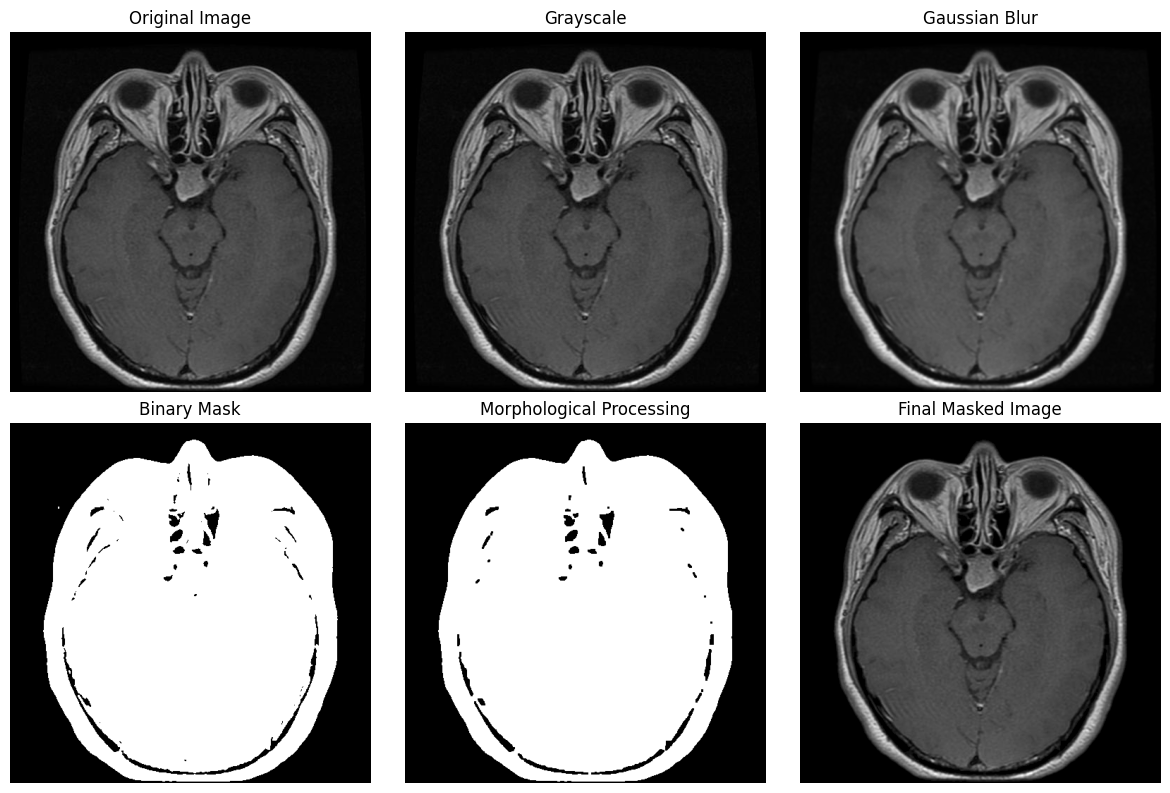

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to process and visualize a single MRI image
def process_and_visualize_single_mri(image_path):
    # Load the MRI image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Apply Gaussian Blur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 2: Thresholding (method for automatic binarization)
    _, binary_mask = cv2.threshold(blurred, 15, 255, cv2.THRESH_BINARY)

    # Step 3: Morphological Opening (removes small noise)
    kernel = np.ones((3, 3), np.uint8)
    binary_morph = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
    binary_morph = cv2.morphologyEx(binary_morph, cv2.MORPH_CLOSE, kernel)

    # Step 4: Apply the morphological mask to the original image
    masked_image = cv2.bitwise_and(image, image, mask=binary_morph)

    # Visualization
    titles = ["Original Image", "Grayscale", "Gaussian Blur", "Binary Mask", "Morphological Processing", "Final Masked Image"]
    images = [image, gray, blurred, binary_mask, binary_morph, masked_image]
    
    plt.figure(figsize=(12, 8))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        cmap = 'gray' if len(images[i].shape) == 2 else None
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Example usage: Replace with the actual path to your MRI image
image_path = "./dataset/mri/mri5.jpg"  # Specify the MRI image file you want to visualize
process_and_visualize_single_mri(image_path)


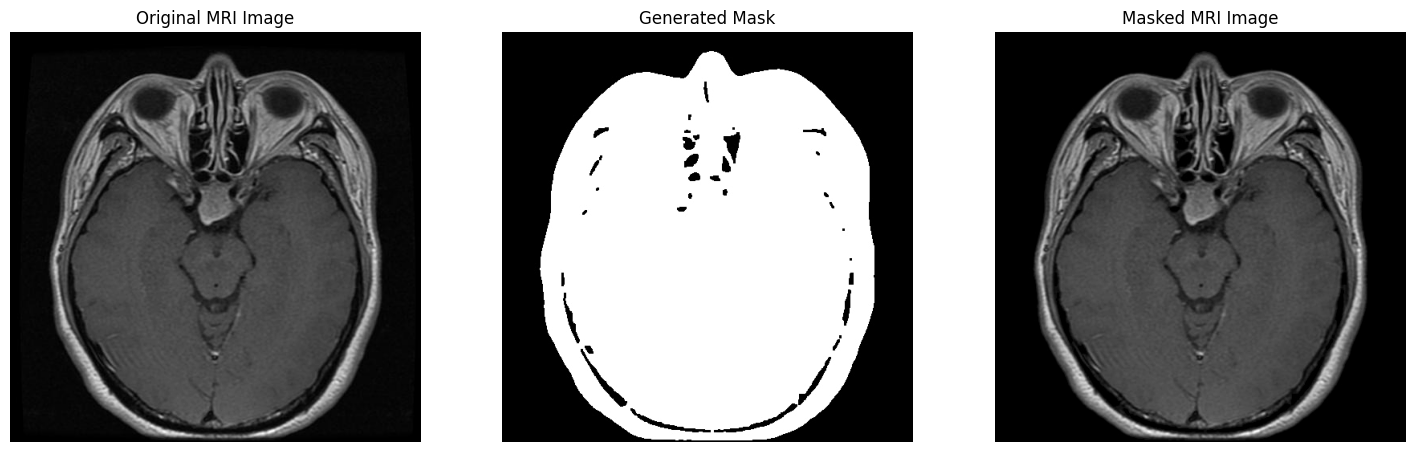

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define file paths for mri5
original_image_path = "./dataset/mri/mri5.jpg"
masked_image_path = "./dataset/mri_morph_images/mri5.jpg"
mask_image_path = "./dataset/mri_morph_mask/mri5.jpg"

# Load images
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
masked_image = cv2.imread(masked_image_path, cv2.IMREAD_GRAYSCALE)
mask_image = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

# Check if all images are loaded correctly
if original_image is None:
    print(f"Error: Unable to load {original_image_path}")
if masked_image is None:
    print(f"Error: Unable to load {masked_image_path}")
if mask_image is None:
    print(f"Error: Unable to load {mask_image_path}")

# Proceed with plotting only if all images are loaded
if original_image is not None and masked_image is not None and mask_image is not None:
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original MRI Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_image, cmap='gray')
    plt.title("Generated Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(masked_image, cmap='gray')
    plt.title("Masked MRI Image")
    plt.axis("off")

    plt.show()
else:
    print("One or more images could not be loaded. Please check file paths.")


### Evaluation

### Creating (using CVAT Tool) and Saving the Ground Truth Image and Mask

In [12]:
%pip install pycocotools


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Image loaded successfully: ./dataset/MRI/mri2.jpg


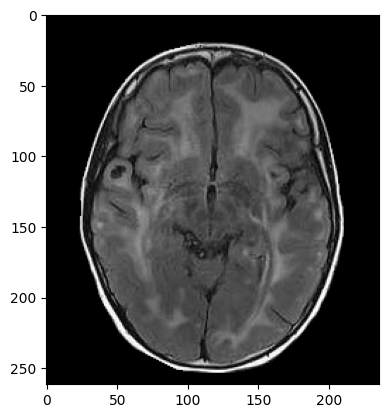

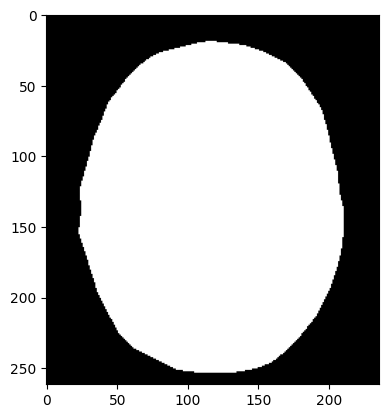

In [3]:
import cv2
import numpy as np
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

# Load COCO annotations from the JSON file
coco = COCO('./dataset/ground_truth.json')  # Path to your COCO annotation file

# Load an image (you can specify the image ID)
image_id = 1  # or another image ID you want to process
img_info = coco.loadImgs([image_id])[0]
image_path = "./dataset/MRI/mri2.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Image at {image_path} could not be loaded.")
else:
    print(f"Image loaded successfully: {image_path}")

# Create a black mask (background is black)
height, width, _ = image.shape
mask = np.zeros((height, width), dtype=np.uint8)

# Load annotations for the image
annotations = coco.loadAnns(coco.getAnnIds(imgIds=[image_id]))

# Iterate over annotations to build the mask
for ann in annotations:
    if 'segmentation' in ann:
        if isinstance(ann['segmentation'], list):  # For polygons
            for segmentation in ann['segmentation']:
                polygon = np.array(segmentation, dtype=np.int32).reshape((-1, 1, 2))
                cv2.fillPoly(mask, [polygon], 255)  # White color for the mask
        elif 'counts' in ann['segmentation']:  # For RLE (Run-Length Encoding)
            rle = coco.annToMask(ann)  # Convert RLE to mask
            mask = cv2.bitwise_or(mask, rle)  # Combine with existing mask

cv2.imwrite('./dataset/mask_output.png', mask) 
# Apply the mask to the image (keep only the annotated areas, black out the rest)
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Save the result as PNG or JPG (optional)
cv2.imwrite('masked_output_final.png', masked_image)  # Save as PNG
# cv2.imwrite('masked_output.jpg', masked_image)  # Or save as JPG

# Show the masked image (image with only annotated regions visible)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display in Matplotlib
plt.show()

# Alternatively, show just the mask
plt.imshow(mask, cmap='gray')
plt.show()


In [1]:
import cv2
import numpy as np
from skimage.metrics import hausdorff_distance

# Paths for the generated output masks
binary_output_path = "./dataset/mri_binary_mask/mri5_mask.jpg"  # Binary Thresholding + Contouring Mask
watershed_output_path = "./dataset/mri_watershed_mask/mri5.jpg"  # Watershed Mask
morph_output_path = "./dataset/mri_morph_mask/mri5.jpg"  # Binary Thresholding + Morphological Mask

# Read generated output masks in grayscale
binary_mask = cv2.imread(binary_output_path, cv2.IMREAD_GRAYSCALE)
watershed_mask = cv2.imread(watershed_output_path, cv2.IMREAD_GRAYSCALE)
morph_mask = cv2.imread(morph_output_path, cv2.IMREAD_GRAYSCALE)

# Check if images are loaded properly
if binary_mask is None:
    raise ValueError(f"Error: Could not load {binary_output_path}")
if watershed_mask is None:
    raise ValueError(f"Error: Could not load {watershed_output_path}")
if morph_mask is None:
    raise ValueError(f"Error: Could not load {morph_output_path}")

# Load Ground Truth Mask (this is assumed to already be available)
gt_path = "./dataset/mask_output.png"  # Ground Truth Mask
gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

# Check if Ground Truth is loaded properly
if gt_mask is None:
    raise ValueError(f"Error: Could not load {gt_path}")

# Resize masks to ensure they are the same size
gt_mask = cv2.resize(gt_mask, (256, 256))
binary_mask = cv2.resize(binary_mask, (256, 256))
watershed_mask = cv2.resize(watershed_mask, (256, 256))
morph_mask = cv2.resize(morph_mask, (256, 256))

cv2.imshow("Ground Truth", gt_mask)

# Function to compute Dice Coefficient, IoU, and Hausdorff Distance
def compute_metrics(gt, pred):
    intersection = np.sum((gt == 255) & (pred == 255))
    union = np.sum((gt == 255) | (pred == 255))
    
    dice = (2 * intersection) / (np.sum(gt == 255) + np.sum(pred == 255))
    iou = intersection / union
    hausdorff = hausdorff_distance(gt, pred)
    
    return dice, iou, hausdorff

# Compute metrics for Binary Threshold + Contouring Mask
dice_binary, iou_binary, hd_binary = compute_metrics(gt_mask, binary_mask)

# Compute metrics for Watershed Mask
dice_watershed, iou_watershed, hd_watershed = compute_metrics(gt_mask, watershed_mask)

# Compute metrics for Morphological Mask
dice_morph, iou_morph, hd_morph = compute_metrics(gt_mask, morph_mask)

# Print results
print(f"Binary Threshold + Contouring Mask - Dice: {dice_binary:.4f}, IoU: {iou_binary:.4f}, Hausdorff Distance: {hd_binary:.2f}")
print(f"Watershed Mask - Dice: {dice_watershed:.4f}, IoU: {iou_watershed:.4f}, Hausdorff Distance: {hd_watershed:.2f}")
print(f"Binary Threshold + Morphological Mask - Dice: {dice_morph:.4f}, IoU: {iou_morph:.4f}, Hausdorff Distance: {hd_morph:.2f}")


Binary Threshold + Contouring Mask - Dice: 0.9477, IoU: 0.9006, Hausdorff Distance: 14.87
Watershed Mask - Dice: 0.9191, IoU: 0.8504, Hausdorff Distance: 16.12
Binary Threshold + Morphological Mask - Dice: 0.9191, IoU: 0.8504, Hausdorff Distance: 16.12


Binary Threshold plus Contouring Mask is giving the best output.
Using this mask for the next processes.

In [ ]:
# import cv2
# import numpy as np
# from skimage.metrics import hausdorff_distance

# # Load image paths
# gt_path = "./dataset/masked_output_final.png"  # Ground Truth Mask
# binary_path = "./dataset/mri_mask/mri5.jpg"  # Binary Mask
# watershed_path = "./dataset/mri_watershed_mask/mri5.jpg"  # Watershed Mask
# morph_path = "./dataset/mri_morph_mask/mri5.jpg"  # Morph Mask
# adaptive_path = "./dataset/mri_adaptive_mask/mri5.jpg"  # Adaptive Mask

# # Read images in grayscale
# gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
# binary_mask = cv2.imread(binary_path, cv2.IMREAD_GRAYSCALE)
# watershed_mask = cv2.imread(watershed_path, cv2.IMREAD_GRAYSCALE)
# morph_mask = cv2.imread(morph_path, cv2.IMREAD_GRAYSCALE)
# adaptive_mask = cv2.imread(adaptive_path, cv2.IMREAD_GRAYSCALE)

# # Check if images are loaded properly
# if gt_mask is None:
#     raise ValueError(f"Error: Could not load {gt_path}")
# if binary_mask is None:
#     raise ValueError(f"Error: Could not load {binary_path}")
# if watershed_mask is None:
#     raise ValueError(f"Error: Could not load {watershed_path}")

# # Resize masks to ensure they are the same size
# gt_mask = cv2.resize(gt_mask, (256, 256))
# binary_mask = cv2.resize(binary_mask, (256, 256))
# watershed_mask = cv2.resize(watershed_mask, (256, 256))
# morph_mask = cv2.resize(morph_mask, (256, 256))
# adaptive_mask = cv2.resize(adaptive_mask, (256, 256))

# # Convert to binary format using thresholding
# _, gt_mask = cv2.threshold(gt_mask, 128, 255, cv2.THRESH_BINARY)
# _, binary_mask = cv2.threshold(binary_mask, 128, 255, cv2.THRESH_BINARY)
# _, watershed_mask = cv2.threshold(watershed_mask, 128, 255, cv2.THRESH_BINARY)
# _, morph_mask = cv2.threshold(morph_mask, 128, 255, cv2.THRESH_BINARY)
# _, adaptive_mask = cv2.threshold(adaptive_mask, 128, 255, cv2.THRESH_BINARY)

# cv2.imshow("Ground Truth", gt_mask)


# # Function to compute Dice Coefficient, IoU, and Hausdorff Distance
# def compute_metrics(gt, pred):
#     intersection = np.sum((gt == 255) & (pred == 255))
#     union = np.sum((gt == 255) | (pred == 255))
    
#     dice = (2 * intersection) / (np.sum(gt == 255) + np.sum(pred == 255))
#     iou = intersection / union
#     hausdorff = hausdorff_distance(gt, pred)
    
#     return dice, iou, hausdorff

# # Compute metrics for Binary Mask
# dice_binary, iou_binary, hd_binary = compute_metrics(gt_mask, binary_mask)

# # Compute metrics for Watershed Mask
# dice_watershed, iou_watershed, hd_watershed = compute_metrics(gt_mask, watershed_mask)

# # Compute metrics for Morphological mask
# dice_morph, iou_morph, hd_morph = compute_metrics(gt_mask, morph_mask)

# dice_adaptive, iou_adaptive, hd_adaptive = compute_metrics(gt_mask, adaptive_mask)



# # Print results
# print(f"Binary Mask - Dice: {dice_binary:.4f}, IoU: {iou_binary:.4f}, Hausdorff Distance: {hd_binary:.2f}")
# print(f"Watershed Mask - Dice: {dice_watershed:.4f}, IoU: {iou_watershed:.4f}, Hausdorff Distance: {hd_watershed:.2f}")
# print(f"Morphological Mask - Dice: {dice_morph:.4f}, IoU: {iou_morph:.4f}, Hausdorff Distance: {hd_morph:.2f}")
# print(f"Adaptive Mask - Dice: {dice_adaptive:.4f}, IoU: {iou_adaptive:.4f}, Hausdorff Distance: {hd_adaptive:.2f}")